# PSU DS 200 Lab 8

In this lab, we will learn the following:
- Convert text (in tweets) into word frequency matrix representation.
- Construct a Decision Tree to classify tweets for sentiment prediction, using the word frequency representation.
- Evaluate the Decision Tree using Confusion Matrix, precision, recall, and f1 measure.
- Interpret the knowledge learned in the Decision Tree using rules.
- Compare the performance of two Decision Tree Models (generated using different depth) using f1 measures for both the training data and the testing data.

## Acknowledgement: This lab uses datascience Python module developed at UC Berkeley.
## The Source of Data used in this lab is an "Airline sentiment tweets" dataset from Kaggle.com.

In [1]:
!pip install datascience

     |████████████████████████████████| 51kB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 92kB 2.3MB/s eta 0:00:01     |█████████████████████▌          | 61kB 5.1MB/s eta 0:00:01
     |████████████████████████████████| 13.0MB 11kB/s  eta 0:00:01    |██▋                             | 1.0MB 639kB/s eta 0:00:19     |███▍                            | 1.4MB 639kB/s eta 0:00:19639kB/s eta 0:00:17 4.6MB 707kB/s eta 0:00:12��██████████▊                 | 6.0MB 707kB/s eta 0:00:10     |████████████████████▏           | 8.2MB 1.2MB/s eta 0:00:05     |████████████████████▎           | 8.3MB 1.2MB/s eta 0:00:05     |█████████████████████           | 8.5MB 1.2MB/s eta 0:00:04
     |████████████████████████████████| 215kB 10.7MB/s eta 0:00:01
     |████████████████████████████████| 133kB 5.5MB/s eta 0:00:01
     |████████████████████████████████| 92kB 6.7MB/s  eta 0:00:01
  Created wheel for datascience: filename=datascience-0.15.3-cp35-none-any.whl size=44582 sha256=e9a407c28e96b180e

Successfully built datascience docopt
  Found existing installation: Jinja2 2.8
    Uninstalling Jinja2-2.8:
      Successfully uninstalled Jinja2-2.8
  Found existing installation: matplotlib 2.1.1
    Uninstalling matplotlib-2.1.1:
      Successfully uninstalled matplotlib-2.1.1
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import datascience
import numpy as np
import graphviz

from datascience import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


### Exercise 1 Load the Tweet File (3 points)
Use Table.read_table to load the airline_sentiment_small.csv file, whicch contain sentiment labels for airline-related tweets.

In [3]:
tweets= Table.read_table('airline_sentiment_small.csv', sep=',')
tweets

tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
Tr_tweet_973,0,0.6671,Can't Tell,0.3651,United,Austin_Grisham,0,@united don't see a justifiable cost to get on an early ...,2/23/2015 11:14,PDX,Alaska
Tr_tweet_2085,1,1,nan,nan,United,eotoro,0,@united Kurt and the crew on UA1745 were amazing today. ...,2/21/2015 14:55,"iPhone: 0.000000,0.000000",Central Time (US & Canada)
Tr_tweet_2589,0,1,Customer Service Issue,0.6804,United,bugstory,0,@united the refund team is far from customer care courte ...,2/20/2015 11:15,"Baltimore, MD",Eastern Time (US & Canada)
Tr_tweet_445,1,1,nan,nan,Virgin America,Perceptions,0,@VirginAmerica really wish you'd fly out of #Fargo @farg ...,2/17/2015 10:33,"Fargo, ND ( & Tucson, AZ)",Central Time (US & Canada)
Tr_tweet_2302,0,1,Cancelled Flight,1,United,DNLee5,0,@united my flight out of BGM Cancelled Flightled last ni ...,2/21/2015 2:21,"New York, US; Tanzania, Africa",Central Time (US & Canada)
Tr_tweet_1111,1,0.6289,nan,0,United,sentientcheese,0,"@united been solved, they finally picked up the second ...",2/23/2015 7:20,nan,nan
Tr_tweet_1734,0,1,Cancelled Flight,0.684,United,ATL_Attorney,0,@united involuntarily bumped your passenger and can't gu ...,2/22/2015 7:54,"Atlanta, GA",Quito
Tr_tweet_138,0,1,Damaged Luggage,1,Virgin America,khartline,0,.@VirginAmerica does that mean you don't have a policy f ...,2/22/2015 12:27,Las Vegas,Pacific Time (US & Canada)
Tr_tweet_1963,0,0.684,Customer Service Issue,0.3499,United,Jo_Frost,0,@united when I read it say ' in some cases' can you plea ...,2/21/2015 19:12,Global,Quito
Tr_tweet_718,0,1,Customer Service Issue,1,United,fortytoo,0,"@united tried calling too, but w/25 min phn wait means w ...",2/23/2015 20:36,"WX report for 41 Mile, Hwy 50",Pacific Time (US & Canada)


In [4]:
X = tweets['text']
X

array(["@united don't see a justifiable cost to get on an early flight with seats. No airline charges to conveniently get their passengers in early",
       "@united Kurt and the crew on UA1745 were amazing today. They made my son's birthday with their kindness. Hope to fly with them again soon!",
       "@united the refund team is far from customer care courtesy they need training on work ethics. So it's like sir u r lying how can I help",
       "@VirginAmerica really wish you'd fly out of #Fargo @fargoairport those fares are amazings",
       '@united my flight out of BGM Cancelled Flightled last night, I get a hotel voucher, but had to pay for a cab back. Worse cab experience ever',
       '@united been solved,  they finally picked up the second time I called,  thanks for the response JH!  7:21 to dulles works!',
       "@united involuntarily bumped your passenger and can't guarantee them another flight for three days!",
       ".@VirginAmerica does that mean you don't have a polic

In [5]:
y = tweets['airline_sentiment']
y

array([0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0.

### Exercise 2 (5 points)
Choose a percentage (e.g., 0.2, 0.25, or 0.3) for splitting the data into training and testing.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
print(X_train)

['@United  great way to start my vacation with an on time departure! Looking forward to my global first class suite!'
 '@united Everyone around us is sitting with their friends and family members. They booked their tickets in October and December. We bought'
 "@united this is nuts they said a flight was on the ground now it's still in Albany and they won't have a plane.  Someone is compensating me"
 "@united haha and you have to clean a plane that was held overnight in a hangar. Sounds lovely. Also don't lie on screensand say it's weather"
 'Very quick! TY. @united: @auciello I am sorry to hear this. Can you please follow and DM me the details of what transpired? ^JH'
 '@united I would understand if weather was the issue, but bc of airline maintenance I had to sleep on an airport floor and lose an entire day'
 '@united thanks United I understand that. But he would actually like his own bag back! What have you done with it?! He also wants the money..'
 "@united involuntarily bumped your

### Use CountVectorizer in sklearn to convert text of each tweet into a word frequency representation 
In Lab 3, we used CountVectorizer to convert a set of short texts into a word frequency matrix representation.  If you do not recall word frequency representation, you may want to revisit Lab 3 to refresh your memory.  In this lab, we are
also going to use CountVectorizer to convert a set of real tweets into a word frequency matrix representation.  We made two improvements to the way we convert text to word frequency matrix in Lab 3.
- Because real tweets contain non-alphanumeric characters such as emojis, we use a regular expression to extract all alphanumeric words, hashtags, and Twitter users (i.e., @...) mentioned in a tweet, ignore the other non-alphanumeric characters.  You do not need to understand the details of how this regulare expression is constructed.  You just need
to understand their function.
- Because the number of tweets are large, we do not want to include any word that occurs only in ONE tweet (why?). 
To do this, we use set "minimum document frequency" (min_df) to be 2.  "Documents" refers to, in this case, tweets.

In [7]:
count_vect = CountVectorizer(token_pattern= '((?:([@#]|[0-9]|[a-z]|[A-Z])+))', analyzer= 'word', min_df=2)

In [8]:
X_word_vect = count_vect.fit_transform(X_train)

In [9]:
print(X_word_vect.shape)

(450, 951)


### Exercise 3 (5 points)
- Choose the parameter for max_depth between 5 and 7 and min_samples_leaf to be 2.
- Evaluate it using confusion matrix, precision, recall, and f1 measure FOR TRAINING DATA.
- Evaluate it using confusion matrix, precision, recall, and f1 measure for TESTING DATA.
#### Put your answer in the text cell for Answer to Exercise 3 below, not here.

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state = 100, max_depth=6, \
                                  min_samples_leaf =2)

In [11]:
clf.fit(X_word_vect, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [12]:
X_test_word_vect = count_vect.transform(X_test)

In [13]:
print(X_test_word_vect.shape)

(150, 951)


In [14]:
predicted_y = clf.predict(X_test_word_vect)
print(predicted_y)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0.]


In [15]:
print(metrics.classification_report(y_test, predicted_y))

             precision    recall  f1-score   support

        0.0       0.86      0.96      0.91       103
        1.0       0.89      0.66      0.76        47

avg / total       0.87      0.87      0.86       150



In [16]:
metrics.confusion_matrix(y_test, predicted_y)

array([[99,  4],
       [16, 31]])

In [17]:
predicted_train_y = clf.predict(X_word_vect)

In [18]:
print(metrics.classification_report(y_train, predicted_train_y))

             precision    recall  f1-score   support

        0.0       0.83      0.99      0.90       297
        1.0       0.96      0.62      0.75       153

avg / total       0.88      0.86      0.85       450



In [19]:
metrics.confusion_matrix(y_train, predicted_train_y)

array([[293,   4],
       [ 58,  95]])

### Answer to Exercise 3 
- Performance Evaluation Using Training Data: 293 True Negative predictions, 4 False Positive predictions, 58 False Negative predictions, 95 True Positive predictions. The training data's precision is 0.96, recall is 0.62, f1-score is 0.75.
- Performance Evaluation Using Testing Data: 99 True Negative predictions, 4 False Positive predictions, 16 False Negative predictions, 31 True Positive predictions. The testing data precision is 0.89, recall is 0.66, and the f1-score is 0.76.

In [20]:
dot_data= tree.export_graphviz(clf, out_file=None, feature_names=count_vect.get_feature_names())

In [21]:
from graphviz import *

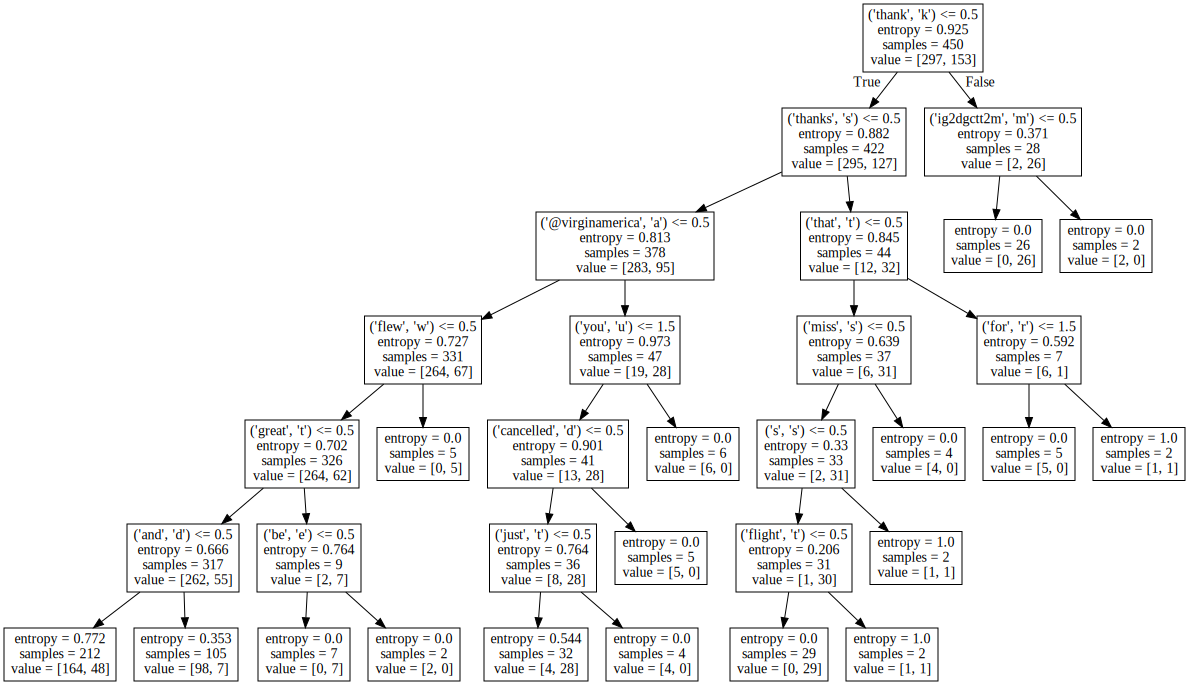

In [22]:
graph = graphviz.Source(dot_data)
graph

In [23]:
graph.render('model1')

'model1.pdf'

### Exercise 4 (5 points)
- Save the visualization of your decision tree in a file (i.e., fill in the file name in the code cell above).
- Choose a leaf node in the decision tree, then describe the classification rule from the root node to the leaf node.

### Answer to Exercise 4: 
- The value of the leaf node: [0, 26]
- The rule from the root node to the leaf node: If the word 'thank' is in the tweet, and 'ig2dgctt2m' is not in the tweet, we would get to that leaf node. 

### Exercise 5 (5 points)
Choose a max_detph of at least 10, construct the decision tree and evaluate its performance using both training data and testing data (similar to Exercise 3).  Provide your answer in the text cell below for "Answer to Exercise 5"

In [24]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state = 100, max_depth=12, \
                                  min_samples_leaf =2)

In [25]:
clf.fit(X_word_vect, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [26]:
X_test_word_vect = count_vect.transform(X_test)

In [27]:
print(X_test_word_vect.shape)

(150, 951)


In [28]:
predicted_y = clf.predict(X_test_word_vect)
print(predicted_y)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0.]


In [29]:
print(metrics.classification_report(y_test, predicted_y))

             precision    recall  f1-score   support

        0.0       0.88      0.92      0.90       103
        1.0       0.81      0.72      0.76        47

avg / total       0.86      0.86      0.86       150



In [30]:
metrics.confusion_matrix(y_test, predicted_y)

array([[95,  8],
       [13, 34]])

In [31]:
predicted_train_y = clf.predict(X_word_vect)

In [32]:
print(metrics.classification_report(y_train, predicted_train_y))

             precision    recall  f1-score   support

        0.0       0.87      0.99      0.93       297
        1.0       0.98      0.71      0.83       153

avg / total       0.91      0.90      0.89       450



In [33]:
metrics.confusion_matrix(y_train, predicted_train_y)

array([[295,   2],
       [ 44, 109]])

### Answer to Exercise 5 (5 points)
- Evaluation Using Training Data: 295 True Negative predictions, 2 False Positive predictions, 44 False Negative predictions, 109 True Positive predictions. The training data's precision is 0.98, recall is 0.71, f1-score is 0.83.
- Evaluation Using Testing Data: 95 True Negative predictions, 8 False Positive predictions, 13 False Negative predictions, 34 True Positive predictions. The training data's precision is 0.81, recall is 0.72, f1-score is 0.76.

In [34]:
dot_data= tree.export_graphviz(clf, out_file=None, feature_names=count_vect.get_feature_names())

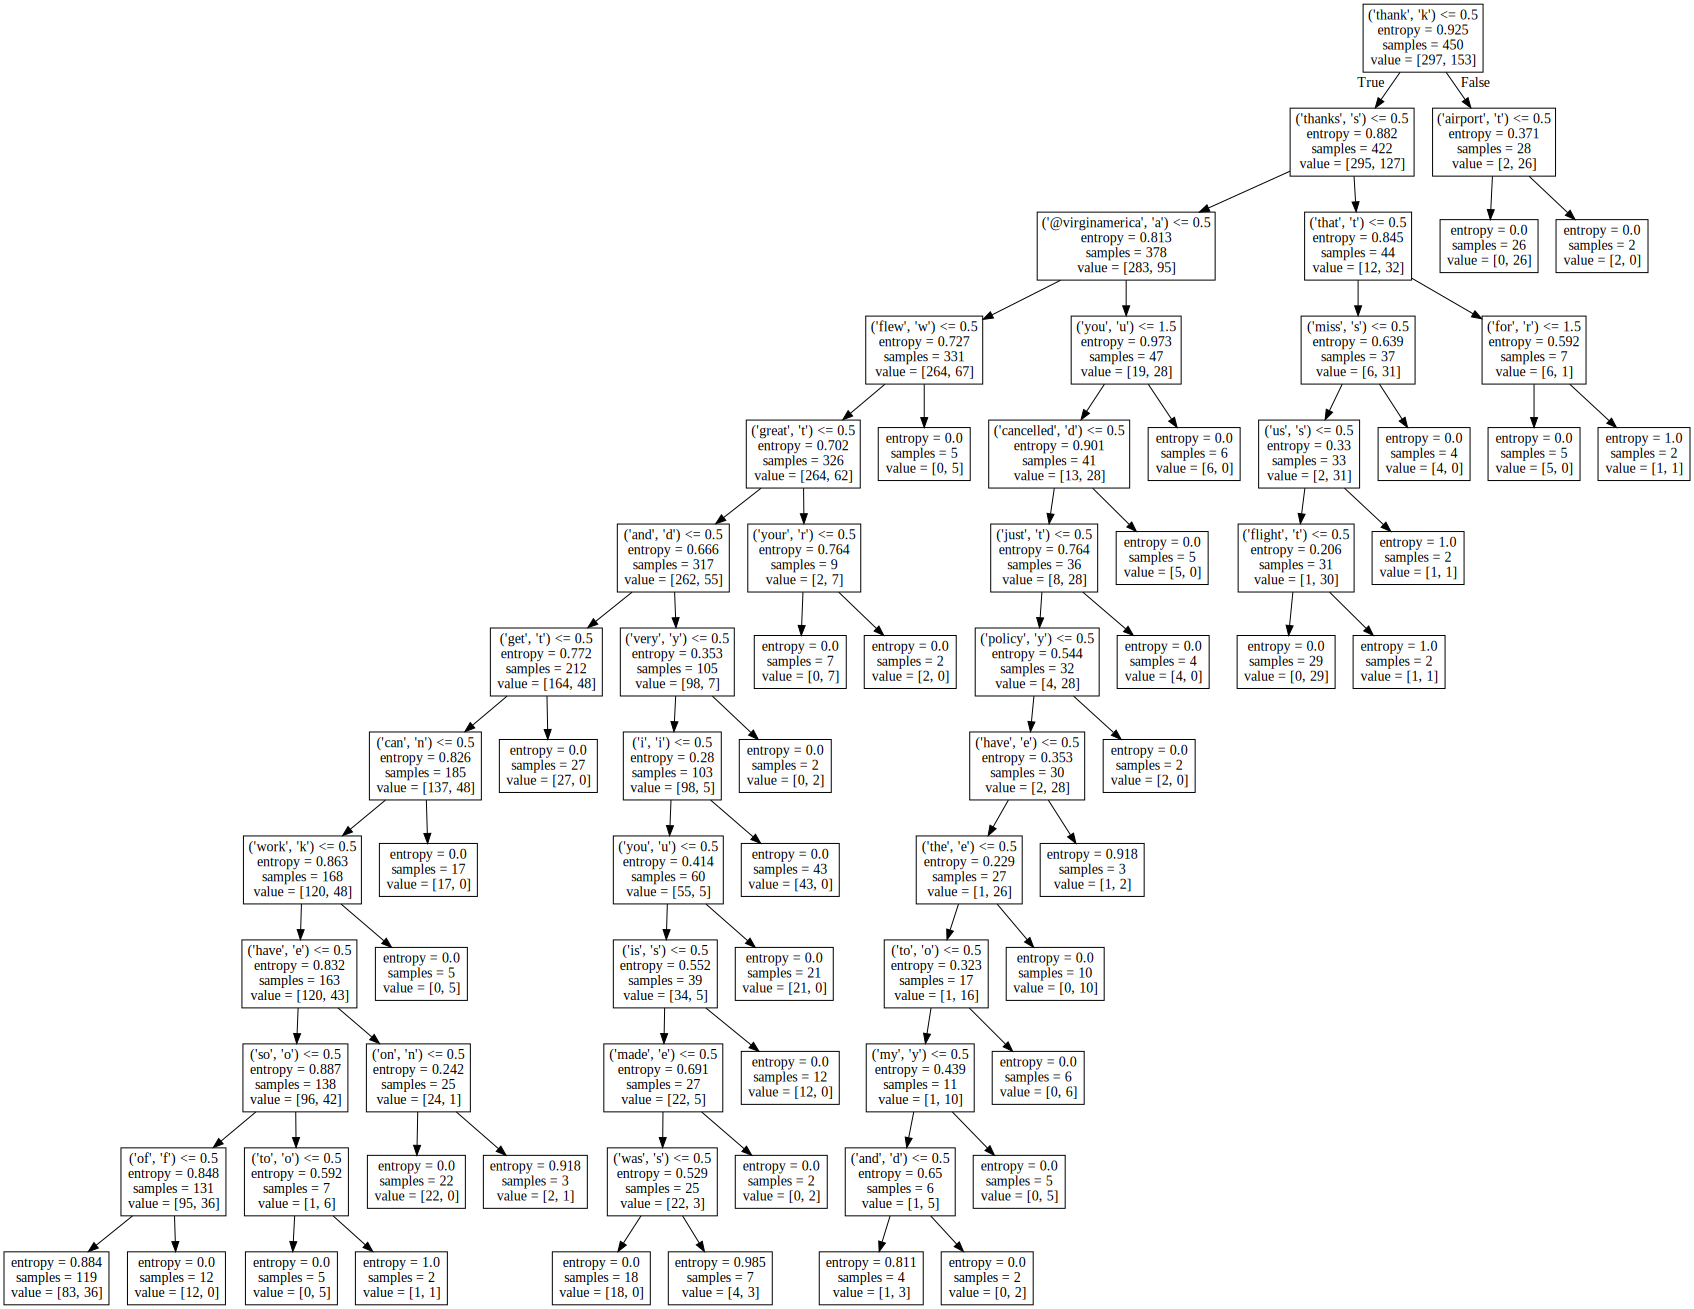

In [35]:
graph = graphviz.Source(dot_data)
graph

In [36]:
graph.render('model2')

'model2.pdf'

### Exercise 6 (7 points)
Based on the results of Exercise 3 (we will referrted to it as Model A) and Exercise 5 (Model B), which one will you choose? Explain the rationale of your decision.
### Answer to Exercise 6:
- Choice of Model: I would choose Model A.
- Rationale of Choice: The f1-score for two models are similar. However, Model A is less overfitting than Model B, due to the f1-score for test and train data are closer. So Model A would be a better choice.